# Adaptive Kalman Filter

This code implements the adaptive Kalman filter for a scalar system with an unknown measurement noise covariance matrix R.

The filter is based on the work in "Adaptive Kalman Filter for Detectable Linear Time-Invariant Systems" by Moghe, Zanetti and Akella at https://arc.aiaa.org/doi/full/10.2514/1.G004359.

Begin by
  * Importing `numpy` and `matplotlib`
  * Defining the system parameters `F, H, Q, R`
  * Defining the number of timesteps to simulate `T`
  * Initializing
    * State estimate `x_post`
    * State estimate error covariance `P_post`
    * Measurement noise covariance estimate `R_est`
    * Measurement error covariance `L`

In [1]:
import numpy as np, numpy.random as npr, matplotlib.pyplot as plt
F, H, Q, R = 0.5, 1, 3, 5
x_post, P_post, R_est, L = 0, 10, 10, 0
x = npr.randn()
T = 100000
R_est_history = np.zeros(T)

Precompute some quantities needed for the noise covariance estimation.

In [2]:
Mopi    = 1/H
A1      = 1
B1      = -F*Mopi
B2      = Mopi
kronA   = A1**2
kronB   = B1**2+B2**2
S       = np.copy(kronB)
CW      = kronA*Q
print_k = np.logspace(0,np.log10(T),np.log10(T)+1)

In [3]:
def noise_covariance_estimation(y_new, y_old, L):
    Z = Mopi*(y_new-F*y_old)
    L = L*(k-1)/k + Z*Z/k
    return (L-CW)/S, L

In [4]:
def state_estimation(x_post, P_post):
    x_pre  = F*x_post
    P_pre  = F*P_post*F + Q
    K      = P_pre*H/(H*P_pre*H+R_est)
    x_post = x_pre + K*(ynew-H*x_pre)
    IKH    = 1 - K*H
    P_post = IKH*P_pre*IKH + K*R*K
    return x_post, P_post

Run the adaptive Kalman filter iterations.

In [5]:
for k in range(T):
    w, v = Q**0.5*npr.randn(), R**0.5*npr.randn()
    ynew = H*x + v
    if k > 0:
        R_est_new, L = noise_covariance_estimation(ynew, yold, L)
        if R_est_new > 0: 
            R_est = R_est_new
    R_est_history[k] = R_est  
    x_post, P_post = state_estimation(x_post, P_post)
    x = F*x + w
    yold = np.copy(ynew)
    if k+1 in print_k: 
        print('k = %8d: R_true = %8.6f, R_est = %8.6f' % (k+1, R, R_est))

k =        1: R_true = 5.000000, R_est = 10.000000
k =       10: R_true = 5.000000, R_est = 2.258741
k =      100: R_true = 5.000000, R_est = 6.043960
k =     1000: R_true = 5.000000, R_est = 5.168508
k =    10000: R_true = 5.000000, R_est = 5.041902
k =   100000: R_true = 5.000000, R_est = 5.024265


Plot the results of the estimation error of R. The log-log plot shows convergence to the true value, albeit at a slow geometric rate.

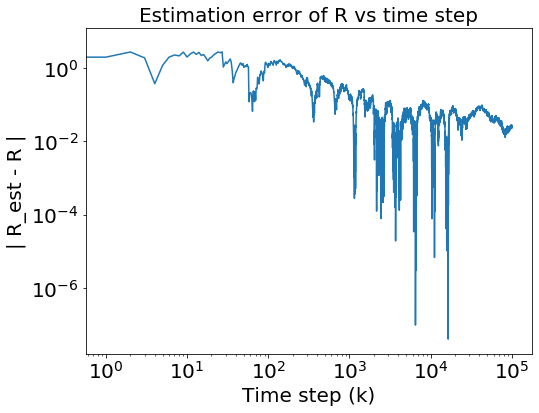

In [7]:
fig,ax = plt.subplots(figsize=(8, 6))
plt.loglog(np.abs(R_est_history-R))
plt.xlabel("Time step (k)")
plt.ylabel("| R_est - R |")
plt.title("Estimation error of R vs time step")
for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
             ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(20)
plt.show()